In [2]:
import pickle
import re
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from pygsp import graphs
%matplotlib inline



## Build Adjacency Matrix

In [ ]:
def collect_9_leagues_for_year(year):
    filename="./transfer_data/{}/english_premier_league.csv".format(year)
    eng=pd.read_csv(filename)

    filename="./transfer_data/{}/italian_serie_a.csv".format(year)
    ita=pd.read_csv(filename)

    filename="./transfer_data/{}/french_ligue_1.csv".format(year)
    fra=pd.read_csv(filename)

    filename="./transfer_data/{}/portugese_liga_nos.csv".format(year)
    prt=pd.read_csv(filename)

    filename="./transfer_data/{}/german_bundesliga_1.csv".format(year)
    deu=pd.read_csv(filename)

    filename="./transfer_data/{}/spanish_primera_division.csv".format(year)
    esp=pd.read_csv(filename)

    filename="./transfer_data/{}/dutch_eredivisie.csv".format(year)
    nld=pd.read_csv(filename)
    
    filename="./transfer_data/{}/english_championship.csv".format(year)
    eng2=pd.read_csv(filename)
    
    filename="./transfer_data/{}/russian_premier_liga.csv".format(year)
    rus=pd.read_csv(filename)    
    
    
    
    select_league=[eng,ita,fra,prt,deu,esp,nld,eng2,rus]
    transfer_9_league=pd.concat(select_league, ignore_index=True)
    return transfer_9_league
collect_9_leagues_for_year(2019).head()

In [28]:
def collect_7_leagues_for_year(year):
    filename="./transfer_data/{}/english_premier_league.csv".format(year)
    eng=pd.read_csv(filename)

    filename="./transfer_data/{}/italian_serie_a.csv".format(year)
    ita=pd.read_csv(filename)

    filename="./transfer_data/{}/french_ligue_1.csv".format(year)
    fra=pd.read_csv(filename)

    filename="./transfer_data/{}/portugese_liga_nos.csv".format(year)
    prt=pd.read_csv(filename)

    filename="./transfer_data/{}/german_bundesliga_1.csv".format(year)
    deu=pd.read_csv(filename)

    filename="./transfer_data/{}/spanish_primera_division.csv".format(year)
    esp=pd.read_csv(filename)

    filename="./transfer_data/{}/dutch_eredivisie.csv".format(year)
    nld=pd.read_csv(filename)
    
    select_league=[eng,ita,fra,prt,deu,esp,nld]
    transfer_7_league=pd.concat(select_league, ignore_index=True)
    return transfer_7_league
collect_7_leagues_for_year(2019).head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season
0,Manchester City,Rodri,23,Defensive Midfield,Atlético Madrid,£63.00m,in,63.0,Premier League,2019,2019/2020
1,Manchester City,João Cancelo,25,Right-Back,Juventus,£58.50m,in,58.5,Premier League,2019,2019/2020
2,Manchester City,Pedro Porro,19,Right-Back,Girona,£10.80m,in,10.8,Premier League,2019,2019/2020
3,Manchester City,Angeliño,22,Left-Back,PSV Eindhoven,£10.80m,in,10.8,Premier League,2019,2019/2020
4,Manchester City,Zack Steffen,24,Goalkeeper,Columbus Crew,£7.20m,in,7.2,Premier League,2019,2019/2020


In [43]:
def collect_7_leagues_for_years(year_start,year_end):
    collect=[]
    for year in range(year_start,year_end+1):
        collect.append(collect_7_leagues_for_year(year))
    select_year=list(range(year_start,year_end+1))
    transfer_7_league_for_years=pd.concat(collect, ignore_index=True)
    return transfer_7_league_for_years
transfer_span=collect_7_leagues_for_years(2000,2019)
transfer_span.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season
0,Arsenal FC,Sylvain Wiltord,26.0,Second Striker,G. Bordeaux,£15.75m,in,15.75,Premier League,2000,2000/2001
1,Arsenal FC,Francis Jeffers,20.0,Centre-Forward,Everton,£13.77m,in,13.77,Premier League,2000,2000/2001
2,Arsenal FC,Laurén,23.0,Right-Back,RCD Mallorca,£9.63m,in,9.63,Premier League,2000,2000/2001
3,Arsenal FC,Robert Pirès,26.0,Left Midfield,Marseille,£8.82m,in,8.82,Premier League,2000,2000/2001
4,Arsenal FC,Tomas Danilevicius,21.0,Centre-Forward,Lausanne-Sport,£1.35m,in,1.35,Premier League,2000,2000/2001


In [44]:
# Here we can see that the number of transfer in seasons 2018/19 and 2019/20 is in total
# 10943  with a total value of 18 Billion Pounds
print(collect_7_leagues_for_years(2018,2019)['fee_cleaned'].sum(),'\n')
collect_7_leagues_for_years(2018,2019).info()

18290.696 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10943 entries, 0 to 10942
Data columns (total 11 columns):
club_name             10943 non-null object
player_name           10943 non-null object
age                   10943 non-null int64
position              10943 non-null object
club_involved_name    10943 non-null object
fee                   10943 non-null object
transfer_movement     10943 non-null object
fee_cleaned           9646 non-null float64
league_name           10943 non-null object
year                  10943 non-null int64
season                10943 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 940.5+ KB


In [45]:
transfer_span.league_name.unique()

"""different names are used:
Primeira Liga = Liga Nos (Liga Portugal)
Primera Division = La Liga (spanish league)
1 Bundesliga = Bundesliga (German league)

To avoid ambiguity, we use the following schema:
'Premier League'
'Serie A'
'Ligue 1'
'Primeira Liga' 
'Bundesliga'
'La Liga'
'Eredivisie'
"""


def league_name_unify(league):
    if league == 'Liga Nos':
        return 'Primeira Liga'
    if league == '1 Bundesliga':
        return 'Bundesliga'
    if league == 'Primera Division':
        return 'La Liga'
    else:
        return league


transfer_span['league_name'] = transfer_span['league_name'].apply(
    league_name_unify)


surplus = ['FC', 'AS', 'CF', '1909', 'Olympique', 'SL',
           'SSC', 'SS', 'UC', 'US', 'HSC', 'OGC', 'UD', 'SV', 'VfL', 'BC', 'SD',
           'LOSC', 'SC',' Balompié','RCD','CD','CS','Calcio']  # ,'RC','RB','SC','CD','CA'



def unify_club_name(column):
    for extra in surplus:
        transfer_span[column] = transfer_span[column].str.replace(
            extra, '') 
    transfer_span[column] = transfer_span[column].str.strip()
    transfer_span[column] = transfer_span[column].apply(lambda x:re.sub('[0-9]+','',x))
    return 
unify_club_name('club_name')
unify_club_name('club_involved_name')

"check if league names are changed"
transfer_span['league_name'].unique()

array(['Premier League', 'Serie A', 'Ligue 1', 'Primeira Liga',
       'Bundesliga', 'La Liga', 'Eredivisie'], dtype=object)

In [46]:
transfer_span.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season
0,Arsenal,Sylvain Wiltord,26.0,Second Striker,G. Bordeaux,£15.75m,in,15.75,Premier League,2000,2000/2001
1,Arsenal,Francis Jeffers,20.0,Centre-Forward,Everton,£13.77m,in,13.77,Premier League,2000,2000/2001
2,Arsenal,Laurén,23.0,Right-Back,Mallorca,£9.63m,in,9.63,Premier League,2000,2000/2001
3,Arsenal,Robert Pirès,26.0,Left Midfield,Marseille,£8.82m,in,8.82,Premier League,2000,2000/2001
4,Arsenal,Tomas Danilevicius,21.0,Centre-Forward,Lausanne-Sport,£1.35m,in,1.35,Premier League,2000,2000/2001


In [47]:
"""
Build a reduced transfer DataFrame for  geo-visualization

""";
top_club=transfer_span['club_name'].unique().tolist()

transfer_span_reduced=transfer_span[transfer_span['club_involved_name'].isin(top_club)]

pkl_file = open('./temporary_pkl/transfer_span_reduced.pkl','wb')
pickle.dump(transfer_span_reduced, pkl_file)
pkl_file.close()

In [48]:
#introduce club score data scraped from https://projects.fivethirtyeight.com/global-club-soccer-rankings/
pkl_file = open('./temporary_pkl/club_score_df.pkl','rb')
club_score_df = pickle.load(pkl_file)
pkl_file.close()

In [49]:
club_score_df

,club,score,league,country
0,Liverpool,94.1,Premier League,England
1,Manchester City,93.9,Premier League,England
2,Bayern Munich,93.4,Bundesliga,Germany
3,Paris Saint-Germain,90.5,Ligue 1,France
4,Real Madrid,90.1,La Liga,Spain
...,...,...,...,...
129,Twente Enschede,34.0,Eredivisie,Netherlands
130,Emmen,32.0,Eredivisie,Netherlands
131,RKC,30.8,Eredivisie,Netherlands
132,Fortuna Sittard,28.2,Eredivisie,Netherlands


In [50]:
transfer_span.club_involved_name.unique()[:40]

array(['G. Bordeaux', 'Everton', 'Mallorca', 'Marseille',
       'Lausanne-Sport', 'Skonto Riga', 'KB (K II)', 'Nîmes',
       'Northampt. Town', 'Peterborough', 'Crystal Palace',
       'Arsenal Res.', 'Arsenal U', 'Dunfermline A.', 'Bristol City',
       'Cardiff', 'Nottm Forest', 'Unterhaching', 'Den Bosch',
       'Saint-Étienne', 'Barcelona', 'Watford', 'Reading', 'West Ham',
       'Cannes', 'San Lorenzo', 'Hilal', 'Bournemouth', 'River Plate',
       'Fenerbahce', 'Bayern U', 'Liverpool', 'P Eindhoven', 'Spurs',
       'Roma', 'Sheff Wed', 'Blackpool', 'Aston Villa U', 'Oxford United',
       'York City'], dtype=object)

In [51]:
len(transfer_span.club_name.unique())

282

In [52]:
transfer_span.club_name.unique()

array(['Arsenal', 'Aston Villa', 'Chelsea', 'Middlesbrough',
       'Ipswich Town', 'Newcastle United', 'Manchester United',
       'Coventry City', 'Leicester City', 'Leeds United',
       'West Ham United', 'Derby County', 'Everton', 'Liverpool',
       'Tottenham Hotspur', 'Southampton', 'Manchester City',
       'Sunderland A', 'Charlton Athletic', 'Bradford City', 'Roma',
       'Brescia', 'AC Parma', 'Hellas Verona', 'Lazio', 'Udinese',
       'AC Fiorentina', 'Juventus', 'Atalanta', 'AC Perugia', 'Lecce',
       'Bologna', 'Internazionale', 'Milan AC', 'Reggina', 'Vicenza',
       'Napoli', 'Bari', 'Girondins Bordeaux', 'Monaco', 'Marseille',
       'Stade Rennais', 'AJ Auxerre', 'Metz', 'Toulouse',
       'Paris Saint-Germain', 'Bastia', 'Saint-Étienne',
       'RC Strasbourg Alsace', 'RC Lens', 'EA Guingamp', 'Nantes', 'Lyon',
       'Sedan-Ardennes', 'Lille', 'ES Troyes AC', 'Boavista Porto',
       'Porto', 'Sporting CP', 'Braga', 'União de Leiria', 'Benfica',
       'Belene

In [53]:
transfer_span=transfer_span.merge(club_score_df,left_on='club_name',right_on='club',how='left')
transfer_span.rename({'score':'club_score'},axis='columns',inplace=True)
transfer_span.drop(columns='club',inplace=True)

In [54]:
transfer_span=transfer_span.merge(club_score_df,left_on='club_involved_name',right_on='club',how='left')
transfer_span.rename({'score':'club_involved_score'},axis='columns',inplace=True)
transfer_span.drop(columns='club',inplace=True)

In [55]:
pkl_file = open('./temporary_pkl/avrg_sc_by_league_dict.pkl','rb')
avrg_sc_by_league_dict = pickle.load(pkl_file)
pkl_file.close()

In [56]:
avrg_sc_by_league_dict

{'Bundesliga': 46.4,
 'Eredivisie': 16.7,
 'La Liga': 49.6,
 'Ligue 1': 39.3,
 'Premier League': 50.1,
 'Primeira Liga': 27.8,
 'Serie A': 40.5}

In [57]:
for league in avrg_sc_by_league_dict.keys():
    mask=transfer_span['league_name']==league
    transfer_span[mask]=transfer_span[mask].fillna(avrg_sc_by_league_dict[league])

#transfer_span[mask]

In [58]:
transfer_span.head(10)

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season,club_score,league_x,country_x,club_involved_score,league_y,country_y
0,Arsenal,Sylvain Wiltord,26.0,Second Striker,G. Bordeaux,£15.75m,in,15.75,Premier League,2000,2000/2001,76.4,Premier League,England,50.1,50.1,50.1
1,Arsenal,Francis Jeffers,20.0,Centre-Forward,Everton,£13.77m,in,13.77,Premier League,2000,2000/2001,76.4,Premier League,England,78.5,Premier League,England
2,Arsenal,Laurén,23.0,Right-Back,Mallorca,£9.63m,in,9.63,Premier League,2000,2000/2001,76.4,Premier League,England,59.6,La Liga,Spain
3,Arsenal,Robert Pirès,26.0,Left Midfield,Marseille,£8.82m,in,8.82,Premier League,2000,2000/2001,76.4,Premier League,England,69.8,Ligue 1,France
4,Arsenal,Tomas Danilevicius,21.0,Centre-Forward,Lausanne-Sport,£1.35m,in,1.35,Premier League,2000,2000/2001,76.4,Premier League,England,50.1,50.1,50.1
5,Arsenal,Igors Stepanovs,24.0,Centre-Back,Skonto Riga,£1.35m,in,1.35,Premier League,2000,2000/2001,76.4,Premier League,England,50.1,50.1,50.1
6,Arsenal,Sebastian Svärd,17.0,Defensive Midfield,KB (K II),Free Transfer,in,0.00,Premier League,2000,2000/2001,76.4,Premier League,England,50.1,50.1,50.1
7,Arsenal,Guy Demel,19.0,Right-Back,Nîmes,Free Transfer,in,0.00,Premier League,2000,2000/2001,76.4,Premier League,England,50.4,Ligue 1,France
8,Arsenal,Liam Chilvers,19.0,Centre-Back,Northampt. Town,"End of loanJan 23, 2001",in,0.00,Premier League,2000,2000/2001,76.4,Premier League,England,50.1,50.1,50.1
9,Arsenal,Stuart Taylor,20.0,Goalkeeper,Peterborough,"End of loanMar 15, 2001",in,0.00,Premier League,2000,2000/2001,76.4,Premier League,England,50.1,50.1,50.1


In [59]:
transfer_span[["club_name","club_involved_name","fee_cleaned","season"]].sort_values(by="fee_cleaned", ascending=False)

,club_name,club_involved_name,fee_cleaned,season
90791,Paris Saint-Germain,Barcelona,199.8,2017/2018
92622,Barcelona,Paris SG,199.8,2017/2018
87881,Liverpool,Barcelona,130.5,2017/2018
92609,Barcelona,Liverpool,130.5,2017/2018
96884,Paris Saint-Germain,Monaco,121.5,2018/2019
...,...,...,...,...
42562,Vitória Guimarães,Maria da Fonte,0.0,2009/2010
42561,Vitória Guimarães,Covilhã,0.0,2009/2010
42560,Vitória Guimarães,Pontevedra,0.0,2009/2010
42559,Vitória Guimarães,Randers,0.0,2009/2010


In [60]:
#eng_19.groupby(by=['club_name','club_involved_name']).count()
transfer_span.head()

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,fee_cleaned,league_name,year,season,club_score,league_x,country_x,club_involved_score,league_y,country_y
0,Arsenal,Sylvain Wiltord,26.0,Second Striker,G. Bordeaux,£15.75m,in,15.75,Premier League,2000,2000/2001,76.4,Premier League,England,50.1,50.1,50.1
1,Arsenal,Francis Jeffers,20.0,Centre-Forward,Everton,£13.77m,in,13.77,Premier League,2000,2000/2001,76.4,Premier League,England,78.5,Premier League,England
2,Arsenal,Laurén,23.0,Right-Back,Mallorca,£9.63m,in,9.63,Premier League,2000,2000/2001,76.4,Premier League,England,59.6,La Liga,Spain
3,Arsenal,Robert Pirès,26.0,Left Midfield,Marseille,£8.82m,in,8.82,Premier League,2000,2000/2001,76.4,Premier League,England,69.8,Ligue 1,France
4,Arsenal,Tomas Danilevicius,21.0,Centre-Forward,Lausanne-Sport,£1.35m,in,1.35,Premier League,2000,2000/2001,76.4,Premier League,England,50.1,50.1,50.1


In [61]:
#unweighted

df_adjacency=pd.crosstab(transfer_span['club_name'],transfer_span['club_involved_name'])
idx=sorted(df_adjacency.columns.union(df_adjacency.index).tolist())
df_adjacency=df_adjacency.reindex(index=idx,columns=idx,fill_value=0)

In [62]:
df_adjacency

club_involved_name,,Homburg,Libreville,Munich,München II,de Febrero,de Octubre,de Setiembre,',---,...,Évian B,Évian Thonon Gaillard,Ñublense,Ölstykke,Örebro SK,Örgryte,Östers IF,Östersund,Újpest,Ümraniyespor
club_name,,,,,,,,,,,,,,,,,,,,,
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Homburg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Libreville,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Munich,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
München II,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Örgryte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Östers IF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Östersund,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
adjacency=df_adjacency.values
adjacency,adjacency.shape

print("The adjacency matrix for transfer graph is:\n", adjacency,'\nAnd its shape is {}'.format(adjacency.shape ))

The adjacency matrix for transfer graph is:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 
And its shape is (4138, 4138)


In [64]:
# symmetrize the adjacency matrix, so that the power of adjacency matrix would imply 
# path between two nodes

adjacency_sym = ((adjacency+np.transpose(adjacency)) != 0)*1

In [65]:
adjacency_sym_df=((df_adjacency+df_adjacency.T)!=0)*1


## Build Network

In [66]:
G = nx.from_numpy_array(adjacency_sym)

In [67]:
# Helper function for printing various graph properties
def describe_graph(G):
    print(nx.info(G))
    if nx.is_connected(G):
        print("Avg. Shortest Path Length: %.4f" %nx.average_shortest_path_length(G))
        print("Diameter: %.4f" %nx.diameter(G)) # Longest shortest path
    else:
        print("Graph is not connected")
        print("Diameter and Avg shortest path length are not defined!")
    print("Sparsity: %.4f" %nx.density(G))  # #edges/#edges-complete-graph
    # #closed-triplets(3*#triangles)/#all-triplets
    print("Global clustering coefficient aka Transitivity: %.4f" %nx.transitivity(G))
describe_graph(G)

Name: 
Type: Graph
Number of nodes: 4138
Number of edges: 32852
Average degree:  15.8782
Avg. Shortest Path Length: 3.1498
Diameter: 5.0000
Sparsity: 0.0038
Global clustering coefficient aka Transitivity: 0.1593


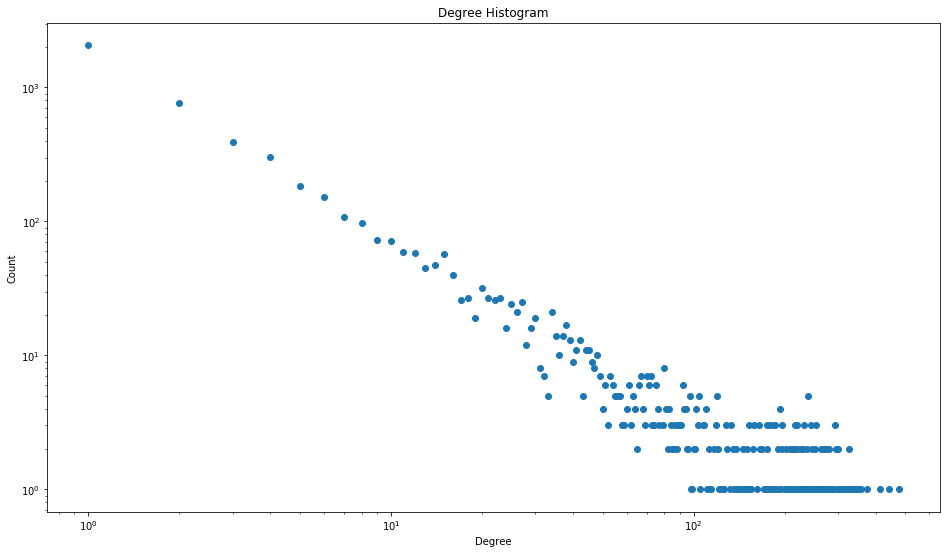

In [41]:
import collections
G = nx.from_numpy_array(adjacency_sym)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(16,9))
plt.scatter(deg, cnt,)# width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

ax.set_xscale('log')
ax.set_yscale('log')


plt.show()

## Exploration

### Frequency Distribution

In [92]:
#sell
# selling=adjacency.sum(axis=0)
# selling.sort()
# selling[::-1]

selling=df_adjacency.sum(axis=0)
selling_rank_df=pd.DataFrame(selling.sort_values(ascending=False).reset_index())

selling_rank_df.columns=['club_involved_name','Num transaction']
selling_rank_df.drop([0,1],inplace=True)
selling_rank_df

,club_involved_name,Num transaction
2,Genoa,431
3,Juventus,364
4,Inter,363
5,Chelsea,343
6,Roma,329
...,...,...
3114,Ingolstadt,0
3115,Go Ahead Eagles Deventer,0
3116,Queens Park Rangers,0
3117,Borussia Mönchengladbach,0


As we can see from the ranking of selling, clubs in Serie A(Italian) has higher number of sells

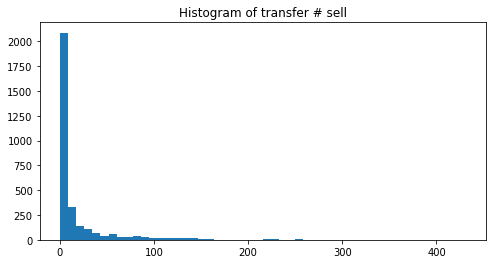

In [93]:
plt.figure(1, figsize=(8, 4))
plt.title("Histogram of transfer # sell")
plt.hist(selling_rank_df['Num transaction'],bins=50);

In [94]:
#buy
# buying=adjacency.sum(axis=1)
# buying.sort()
# buying[::-1]


buying=df_adjacency.sum(axis=1)
buying.sort_values(ascending=False).head(15)

club_name
Parma            1354
Genoa C          1234
Juventus         1100
Chievo Verona    1067
Atalanta         1044
Udinese          1043
Roma              913
Sampdoria         847
AC Milan          823
A Fiorentina      762
Benfica           716
Napoli            711
Inter Milan       685
Bologna           638
Porto             629
dtype: int64

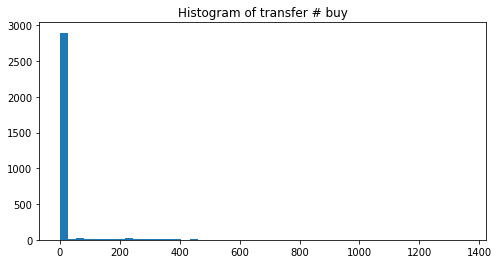

In [95]:
plt.figure(1, figsize=(8, 4))
plt.title("Histogram of transfer # buy")
plt.hist(adjacency.sum(axis=1),bins=50);

In [96]:
#trading=selling+buying
trading=selling+buying
trading.sort_values(ascending=False).head(15)
trading_rank_df=pd.DataFrame(trading.sort_values(ascending=False).reset_index())
trading_rank_df.columns=['club_involved_name','Num transaction']
trading_rank_df.drop([0],inplace=True)
trading_rank_df

,club_involved_name,Num transaction
1,Parma,1643
2,Juventus,1464
3,Udinese,1356
4,Chievo Verona,1278
5,Atalanta,1273
...,...,...
3114,Nashville,1
3115,Cefn Druids,1
3116,Cecina,1
3117,GC Zürich U,1


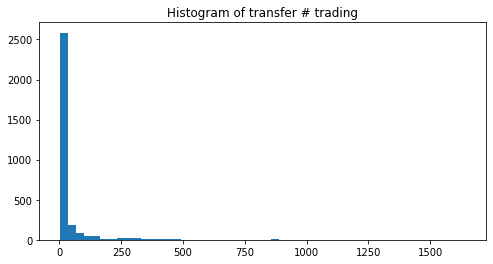

In [97]:
plt.figure(1, figsize=(8, 4))
plt.title("Histogram of transfer # trading")
plt.hist(trading_rank_df['Num transaction'],bins=50);


In [98]:
trading_rank_df.head(20)

,club_involved_name,Num transaction
1,Parma,1643
2,Juventus,1464
3,Udinese,1356
4,Chievo Verona,1278
5,Atalanta,1273
6,Roma,1242
7,Genoa C,1234
8,AC Milan,1140
9,Sampdoria,1134
10,Benfica,1028


In [100]:
trading_rank_df

,index,Num transaction
0,1,925
1,2,365
2,3,211
3,4,155
4,5,106
...,...,...
289,1134,1
290,1028,1
291,964,1
292,870,1


Exponential Fit: y = (a*(x**b))
	a = popt[0] = 0.29549073024300243
	b = popt[1] = -1.2996514216086985


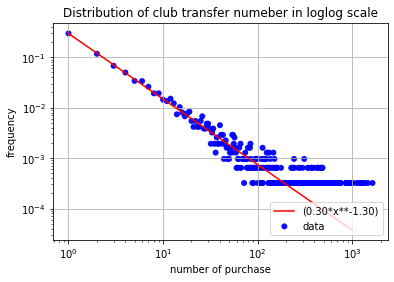

In [89]:

from scipy.optimize import curve_fit

trading_rank_df=trading_rank_df['Num transaction'].value_counts().reset_index()

# Abhishek Bhatia's data & scatter plot.
x = trading_rank_df['index'].to_numpy()

y = trading_rank_df['Num transaction'].to_numpy()
y=y/y.sum()
fig = plt.figure()
ax=plt.gca() 
ax.scatter(x,y,c="blue",alpha=0.95,edgecolors='none', label='data')
ax.set_yscale('log')
ax.set_xscale('log')


newX = np.logspace(0, 3, base=10)  # Makes a nice domain for the fitted curves.
                                   # Goes from 10^0 to 10^3
                                   # This avoids the sorting and the swarm of lines.

# Let's fit an exponential function.  
# This looks like a line on a lof-log plot.
def myExpFunc(x, a, b):
    return a * np.power(x, b)
popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-', 
         label="({0:.2f}*x**{1:.2f})".format(*popt))
print ("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

ax.grid(b='on')
plt.legend(loc='lower right')
plt.title("Distribution of club transfer numeber in loglog scale")
plt.xlabel("number of purchase")
plt.ylabel("frequency")
plt.show()

__*Conclusion*__
The distribution follows a light-tailed distribution 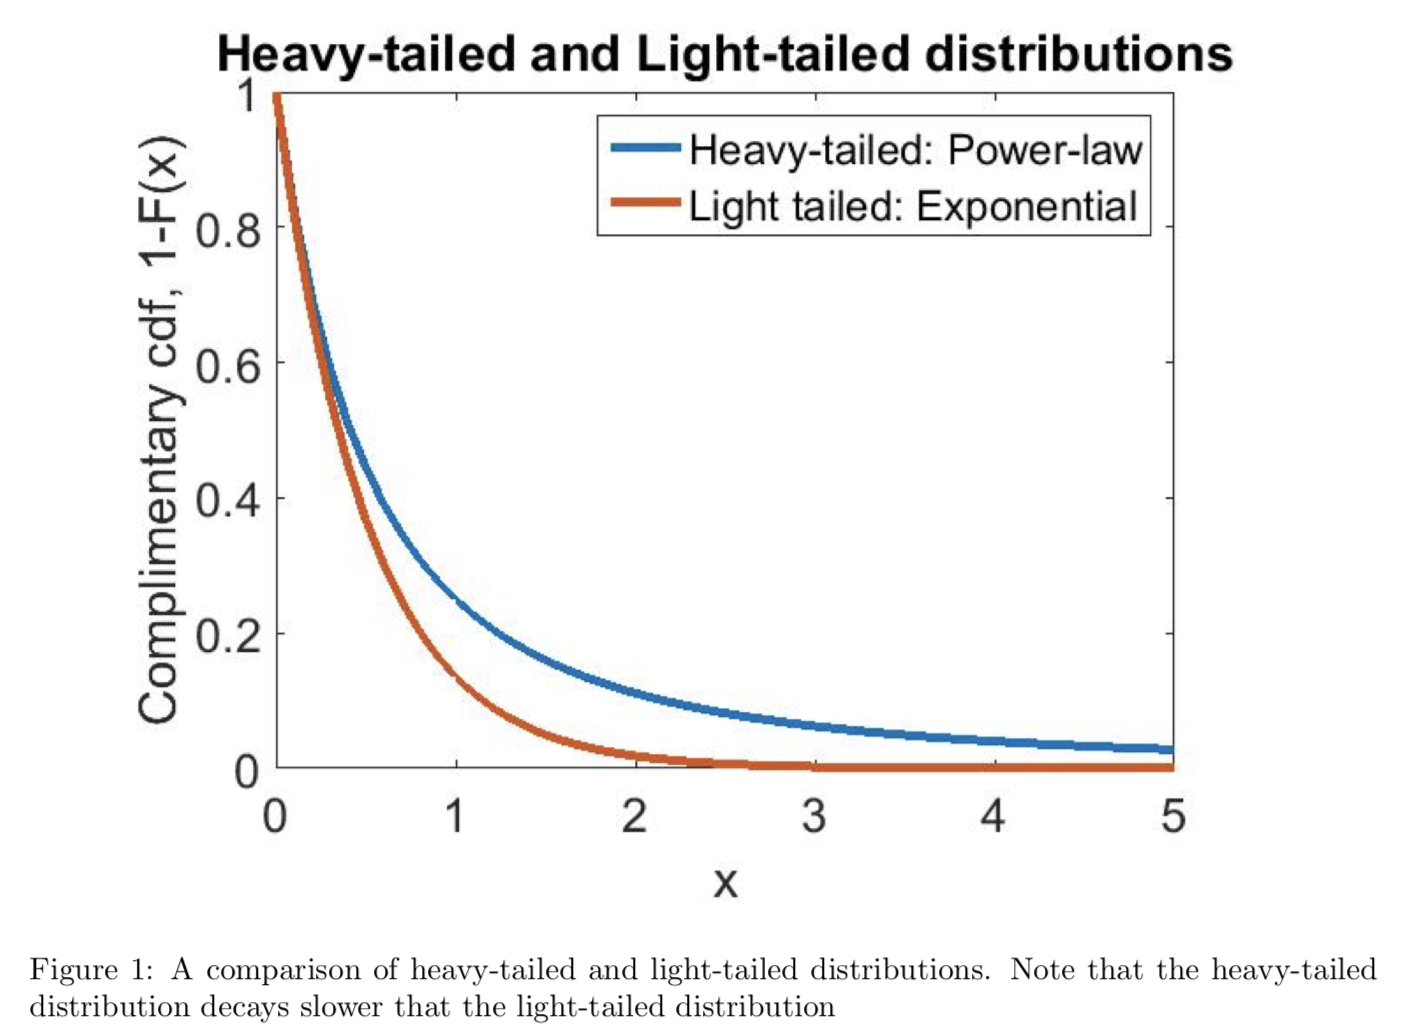

### Sparsity

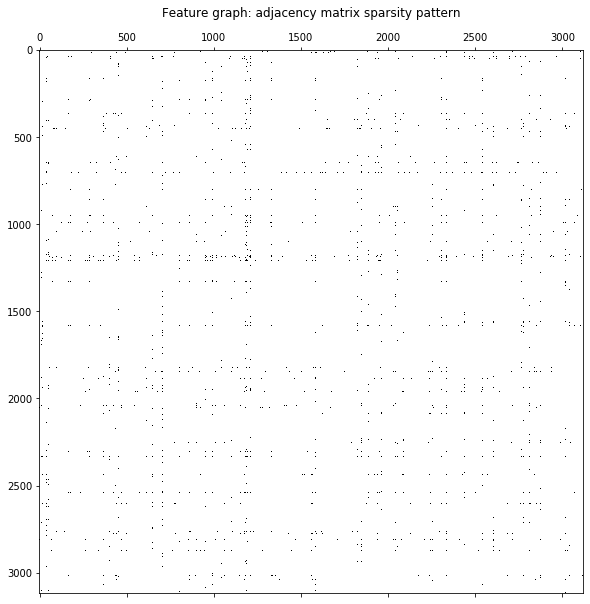

In [53]:
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_title('Feature graph: adjacency matrix sparsity pattern')
axes.spy(adjacency_sym)
plt.show()

$density = \frac{2m}{n(n-1)}$

In [54]:
print("density of the graph is {}".format(round(nx.density(G),6)))

density of the graph is 0.004398


### Connectivity

In [167]:
N = 7
path_matrix = np.zeros(adjacency_sym.shape)
for n in range(1, N+1):
    path_matrix += np.linalg.matrix_power(adjacency_sym, n)
    print("Can all nodes be connected within {}{}{} steps in transfer grapph? {}{}{}".format(
        '\033[1m', n, '\033[0m', '\033[1m', path_matrix.all() > 0, '\033[0m'))

Can all nodes be connected within 1 steps in transfer grapph? False
Can all nodes be connected within 2 steps in transfer grapph? False
Can all nodes be connected within 3 steps in transfer grapph? False
Can all nodes be connected within 4 steps in transfer grapph? False
Can all nodes be connected within 5 steps in transfer grapph? False
Can all nodes be connected within 6 steps in transfer grapph? True
Can all nodes be connected within 7 steps in transfer grapph? True


In [168]:
print(np.linalg.matrix_power(adjacency_sym, 6))

[[93446 12023  3045 ...  1370  1012  2210]
 [12023  7837   428 ...   225   156   307]
 [ 3045   428   549 ...    51    80    78]
 ...
 [ 1370   225    51 ...   765    49   327]
 [ 1012   156    80 ...    49   533    47]
 [ 2210   307    78 ...   327    47   966]]


In [102]:
print('Number of nodes: {}, Number of edges: {}'. format(G.number_of_nodes(), G.number_of_edges()))
print('Number of self-loops: {}, Number of connected components: {}'. format(G.number_of_selfloops(), nx.number_connected_components(G)))

Number of nodes: 3119, Number of edges: 21387
Number of self-loops: 3, Number of connected components: 1


The fact that number of connected component is 1 tells us this graph is connected. But not fully connected( diameter$\neq$ 1)

### Diameter

In [55]:
print(f"Diameter according to networkx: {nx.diameter(G)}")

Diameter according to networkx: 5


We see that the diameter of this network is 5, thus the largest path between two nodes in the network is 5. This is indeed  a small value! It tells us our network has __*small-world propriety*__:Any club could be linked via at most 5 transaction. 

### Clustering Coefficient 

In [56]:
nx.average_clustering(G)

0.2839752479898882

In [61]:
clustring_coef_dict=nx.cluster.clustering(G)
clustring_coef_dict

{0: 0.4358974358974359,
 1: 0,
 2: 0.43478260869565216,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0.12955182072829133,
 8: 0.6263736263736264,
 9: 0.45161290322580644,
 10: 0.13178294573643412,
 11: 0,
 12: 0.3333333333333333,
 13: 0.6071428571428571,
 14: 0.13464235624123422,
 15: 0.17094017094017094,
 16: 0.11384034010392065,
 17: 0,
 18: 0.8333333333333334,
 19: 1.0,
 20: 0.11874145006839945,
 21: 0,
 22: 0,
 23: 0.09109072073405357,
 24: 0,
 25: 0.3333333333333333,
 26: 0,
 27: 0,
 28: 0.26666666666666666,
 29: 0.5833333333333334,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0.1916083916083916,
 37: 0,
 38: 0,
 39: 0.42450142450142453,
 40: 0,
 41: 1.0,
 42: 1.0,
 43: 0.16198019801980199,
 44: 0.6666666666666666,
 45: 0.5470085470085471,
 46: 0,
 47: 0,
 48: 1.0,
 49: 0.11697991967871486,
 50: 0,
 51: 0,
 52: 0.8478260869565217,
 53: 1.0,
 54: 0.13920792079207922,
 55: 0,
 56: 0.9777777777777777,
 57: 1.0,
 58: 0,
 59: 0,
 60: 0.8333333333333334,
 61: 0,
 62: 0.07119535643025576,
 63

In [71]:
{k:v for k,v in sorted(clustring_coef_dict.items(),key=lambda item: item[1],reverse=True)}

{19: 1.0,
 41: 1.0,
 42: 1.0,
 48: 1.0,
 53: 1.0,
 57: 1.0,
 63: 1.0,
 65: 1.0,
 82: 1.0,
 89: 1.0,
 110: 1.0,
 111: 1.0,
 114: 1.0,
 136: 1.0,
 147: 1.0,
 150: 1.0,
 159: 1.0,
 173: 1.0,
 174: 1.0,
 175: 1.0,
 183: 1.0,
 187: 1.0,
 190: 1.0,
 191: 1.0,
 198: 1.0,
 204: 1.0,
 206: 1.0,
 207: 1.0,
 216: 1.0,
 219: 1.0,
 233: 1.0,
 249: 1.0,
 330: 1.0,
 332: 1.0,
 364: 1.0,
 365: 1.0,
 380: 1.0,
 382: 1.0,
 383: 1.0,
 385: 1.0,
 418: 1.0,
 426: 1.0,
 431: 1.0,
 433: 1.0,
 441: 1.0,
 450: 1.0,
 463: 1.0,
 465: 1.0,
 484: 1.0,
 487: 1.0,
 489: 1.0,
 499: 1.0,
 510: 1.0,
 511: 1.0,
 514: 1.0,
 520: 1.0,
 521: 1.0,
 539: 1.0,
 552: 1.0,
 556: 1.0,
 594: 1.0,
 613: 1.0,
 614: 1.0,
 628: 1.0,
 637: 1.0,
 640: 1.0,
 641: 1.0,
 644: 1.0,
 647: 1.0,
 649: 1.0,
 651: 1.0,
 675: 1.0,
 688: 1.0,
 700: 1.0,
 701: 1.0,
 722: 1.0,
 727: 1.0,
 728: 1.0,
 734: 1.0,
 744: 1.0,
 763: 1.0,
 767: 1.0,
 769: 1.0,
 784: 1.0,
 810: 1.0,
 816: 1.0,
 833: 1.0,
 839: 1.0,
 856: 1.0,
 873: 1.0,
 874: 1.0,
 880: 1.0

In [69]:
sorted?

## Section: Network Model

In [35]:
dir(nx)

['AmbiguousSolution',
 'DiGraph',
 'ExceededMaxIterations',
 'Graph',
 'GraphMLReader',
 'GraphMLWriter',
 'HasACycle',
 'LCF_graph',
 'MultiDiGraph',
 'MultiGraph',
 'NetworkXAlgorithmError',
 'NetworkXError',
 'NetworkXException',
 'NetworkXNoCycle',
 'NetworkXNoPath',
 'NetworkXNotImplemented',
 'NetworkXPointlessConcept',
 'NetworkXTreewidthBoundExceeded',
 'NetworkXUnbounded',
 'NetworkXUnfeasible',
 'NodeNotFound',
 'NotATree',
 'OrderedDiGraph',
 'OrderedGraph',
 'OrderedMultiDiGraph',
 'OrderedMultiGraph',
 'PlanarEmbedding',
 'PowerIterationFailedConvergence',
 '__author__',
 '__bibtex__',
 '__builtins__',
 '__cached__',
 '__date__',
 '__doc__',
 '__file__',
 '__license__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'absolute_import',
 'adamic_adar_index',
 'add_cycle',
 'add_path',
 'add_star',
 'adj_matrix',
 'adjacency',
 'adjacency_data',
 'adjacency_graph',
 'adjacency_matrix',
 'adjacency_spectrum',
 'adjlist',
 'algebraic_conn

/Users/Saibo/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


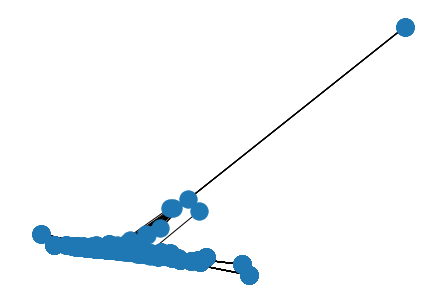

In [198]:
nx.draw_spectral(G)

In [199]:
dir(G)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_cycle',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_path',
 'add_star',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'fresh_copy',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'nodes_with_s

In [209]:
G.node?

In [146]:
nx.density(G)

0.004398335760400829

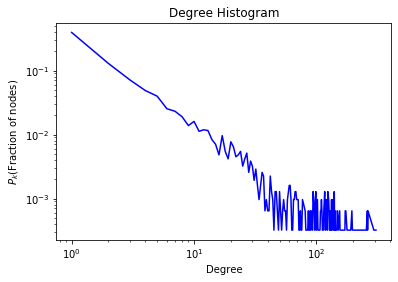

In [140]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
Num_nodes=len(degree_sequence)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cnt_normalized=[elem/Num_nodes for elem in cnt]
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(deg, cnt_normalized, color='b')

plt.title("Degree Histogram")
plt.ylabel("$P_k$(Fraction of nodes)")
plt.xlabel("Degree")

plt.show()

The plot shows degree distribution follows __*power law*__, this is a typical propriety of __*scale-free network.*__

Scale-free networks have:

- many small degree nodes
- not so many nodes around < K >
- high-degree nodes, aka hubs

## Section: Centrality

In [ ]:
nx.betweenness.betweenness_centrality(G)

# Add attributes for nodes in the graph

In [170]:
import sqlite3

con = sqlite3.connect('./large data/database.sqlite')
Team_Attributes_df = pd.read_sql("SELECT * FROM Team_Attributes", con)
Team_df = pd.read_sql("SELECT * FROM Team", con)

In [171]:
Team_df

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


# Weighted graph

In [185]:
df_adjacency_w = pd.crosstab(
    transfer_7_league['club_name'], transfer_7_league['club_involved_name'], values=transfer_7_league['fee_cleaned'],aggfunc=sum)
idx=sorted(df_adjacency.columns.union(df_adjacency.index).tolist())
df_adjacency=df_adjacency.reindex(index=idx,columns=idx,fill_value=0)

In [188]:
df_adjacency_w.fillna(value=0,inplace=True)

In [189]:
df_adjacency_w

club_involved_name,1. FC Köln,1.FC Heidenheim,1.FC Köln II,1.FC Köln U19,1.FC Magdeburg,1.FC Nuremberg,1.FK Pribram,1.FSV Mainz 05,1860 Munich,1º de Agosto,...,Zaglebie Lubin,Zalgiris,Zamalek,Zenit S-Pb,Zlate Moravce,Zulte Waregem,Águeda,Águia,Östersund,Ümraniyespor
club_name,,,,,,,,,,,,,,,,,,,,,
1. FC Köln,0.0,0.0,0.0,0.0,0.00,0.27,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.FC Union Berlin,0.0,0.9,0.0,0.0,0.36,0.00,0.0,1.80,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.FSV Mainz 05,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC Milan,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ACF Fiorentina,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitória Setúbal FC,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Watford FC,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
West Ham United,0.0,0.0,0.0,0.0,0.00,0.00,0.0,6.75,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
df_adjacency_w.sum(axis=0).sort_values(ascending=False).head(10)

club_involved_name
Atlético Madrid    479.250
Real Madrid        351.000
Juventus           346.500
FC Barcelona       323.460
Sevilla FC         204.710
Ajax               201.555
Monaco             199.350
Benfica            195.300
Man Utd            190.350
Man City           189.270
dtype: float64